## This notebook makes the plots for supplementary figures 6 and 7, related to movement analysis

In [1]:
#packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import imageio

#import methods
from motionAnalysis_methods import *
from analysis_utils import *

In [2]:
#this is used to run linear mixed models. Matlab engine needs to be installed
import matlab.engine
eng = matlab.engine.start_matlab()

In [3]:
#IMPORTANT!!!! 
#Change this path to the data folder path in your system
ops = {} 
ops['dataPath'] = os.path.join('Z:', 'home', 'shared', 'Alex_analysis_camp', 'data_axonsPaper')

### Define variables for future use

In [4]:
ops['outputPath'] = os.path.join(ops['dataPath'],'analysisOutputs')
ops['areas'] = ['V1','P','POR','LI', 'LM', 'AL','RL','A','AM', 'PM']
ops['mm'] = 0.0393701
ops['myColorsDict'] = {'HVA_colors' : {'V1': '#4A443F', 
                        'POR': '#FF8623', #4C9E57
                        'P': '#FFB845', #AAC255
                        'LI': '#F5501E', #79B855            
                        'LM' : '#EB7C6C',
                        'AL' : '#DB839F',                
                        'RL' : '#BB83DB',
                        'A': '#8172F0',
                        'AM': '#4062F0',
                        'PM': '#6CBEFF',                                                  
                        'OUT': 'lightgray',
                        'ventral': '#FF8623',
                        'dorsal': '#4062F0',
                        'dorso-ventral': '#A161A4'}} #FF8606
ops['dorsal'] = ['AM', 'PM', 'A', 'RL'] 
ops['ventral'] = ['P', 'POR', 'LI', 'LM', 'AL']  
ops['groups'] = ['V1', 'Ventral', 'Dorsal'] 
ops['colors_groups'] = ['#4A443F',ops['myColorsDict']['HVA_colors']['POR'],ops['myColorsDict']['HVA_colors']['AM']] 
ops['color_motor'] = '#FF9D00'
ops['color_stim'] = '#1368F0'
ops['color_full'] = '#C90700'
ops['color_stimSub'] =  '#BF65C9' 
ops['color_motorSub'] = '#008D36'

ops['azimuths'] = ['-108','-90','-72','-54','-36','-18','0','18','36','54','72','90','108']
ops['freq_names'] = ['2', '4', '8', '16', '32', '64']

ops['ref'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice.png'))
ops['ref2'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice_uncropped.png'))
ops['map_V1'] = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_V1Marked.png'))
map_colors = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_colors.png'))
ops['map_colors'] = map_colors[:,:,0:3]
ops['colors_LUT'] = np.load(os.path.join(ops['dataPath'],'reference_maps','colorMap_LUT_allen.npy'), allow_pickle = True).item()
       
groups = np.load(os.path.join(ops['dataPath'],'injectionPosition_groups.npy'), allow_pickle=True).item()
ops['ventralAnimals'] = groups['ventralAnimals']
ops['dorsalAnimals'] = groups['dorsalAnimals']
ops['posteriorAnimals'] = groups['posteriorAnimals']
ops['anteriorAnimals'] = groups['anteriorAnimals']

### Facial motion

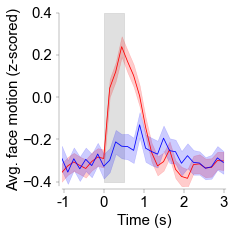

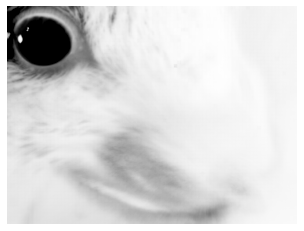

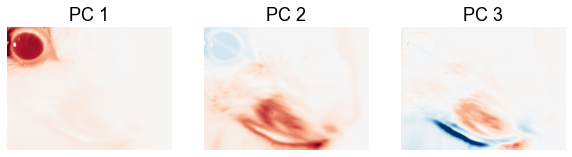

In [5]:
#average facial motion in an example session
exampleDataPath = os.path.join(ops['dataPath'], 'examples','motion_example')
plotAvgFaceMotion_example(exampleDataPath, ops)

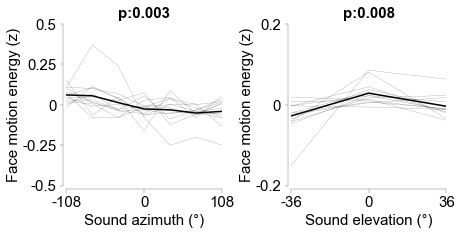

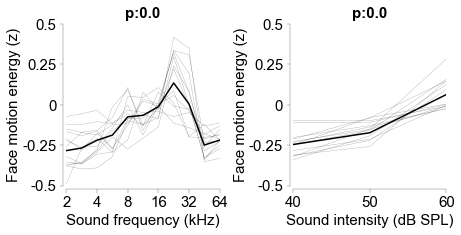

In [6]:
#average facial motion depending on stimulus azimuth, elevation, frequency or sound-intensity
plotAvgFaceMotion(ops)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.88it/s]


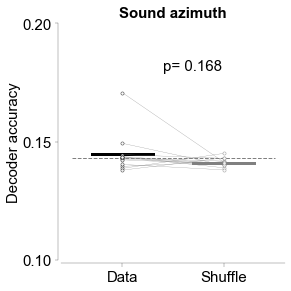

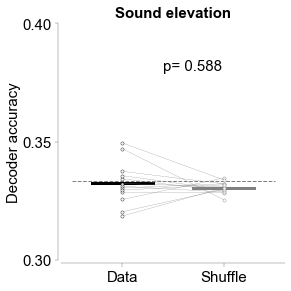

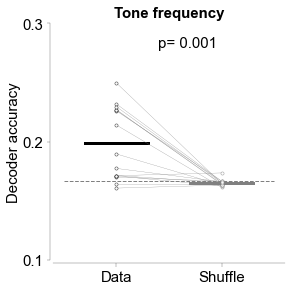

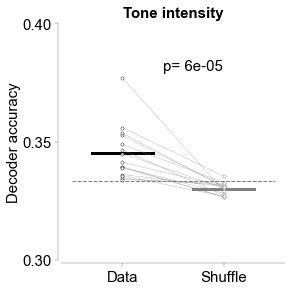

In [7]:
#For each animal, decode the location, frequency or sound intensity of the presented stimulus based on facial motion principal components
plotFaceMotionDecoders(ops)

### GLM

#### Location tuning dataset

100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [00:13<00:00, 10.33it/s]


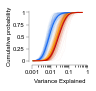

In [8]:
df = pd.read_csv(os.path.join(ops['dataPath'],'locations_dataset', 'df_coliseum_boutons_final.csv')) #dataframe with info for each roi
paths0 = np.load(os.path.join(ops['dataPath'],'locations_dataset', 'animalPaths_locations.npy'))
paths = makeDataPaths(os.path.join(ops['dataPath'],'data_byAnimal'),paths0)   
dataset = 'locations'

#Plot variance explained by each set of variables
varExp, modelSig = plotCumulativeDist(df, paths, dataset, ops)

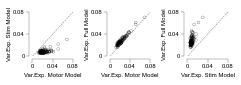

In [9]:
varExp = np.load(os.path.join(ops['dataPath'], 'locations_dataset','varExp_GLM_boutons_locations.npy'), allow_pickle=True).item()
#PLot variance explained per session depending on the set of variables used
plotVarExp_bySession(varExp, ops, dataset)

4.263077001365877e-23
2.1538637334020877e-23
0.05023286614324226


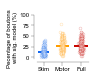

In [10]:
sig_GLM = np.load(os.path.join(ops['dataPath'], 'locations_dataset','statistics_GLM_boutons_locations.npy'), allow_pickle=True).item()

#Percentage of boutons where each set of variables explained a significant amount of variance
plotPropSig_GLM(sig_GLM,ops,dataset)

#### Frequency tuning dataset

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [00:11<00:00, 14.58it/s]


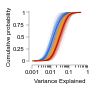

In [11]:
df = pd.read_csv(os.path.join(ops['dataPath'],'frequencies_dataset', 'df_freq_peak_boutons.csv')) #dataframe with info for each roi
paths0 = np.load(os.path.join(ops['dataPath'],'frequencies_dataset', 'animalPaths_freqs.npy'))
paths = makeDataPaths(os.path.join(ops['dataPath'],'data_byAnimal'),paths0)   
dataset = 'freqs'

#Plot variance explained by each set of variables
varExp, modelSig = plotCumulativeDist(df, paths, dataset, ops)

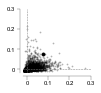

In [12]:
path = paths[108]
#Plot variance explained by each set of variables for all boutons in one example session
plotVarExp_example(path, ops)

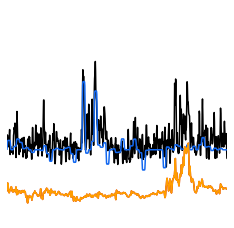

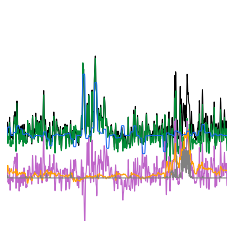

In [13]:
path = paths[108]
#Plot example of fluorescence reconstructed from each set of variables, and effect of subtracting the reconstructed fluorescence
plotGLM_traces_example(path, ops)

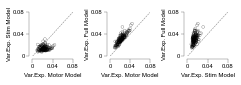

In [14]:
varExp = np.load(os.path.join(ops['dataPath'], 'frequencies_dataset','varExp_GLM_boutons_frequencies.npy'), allow_pickle=True).item()
dataset = 'freqs'
#PLot variance explained per session depending on the set of variables used
plotVarExp_bySession(varExp, ops, dataset)

0.4173587514377385
7.214644384663307e-11
2.7949850320358375e-23


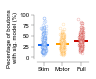

In [15]:
sig_GLM = np.load(os.path.join(ops['dataPath'], 'frequencies_dataset','statistics_GLM_boutons_frequencies.npy'), allow_pickle=True).item()
#Percentage of boutons where each set of variables explained a significant amount of variance
plotPropSig_GLM(sig_GLM,ops,dataset)

### GLM motor subtraction

#### Frequencies dataset

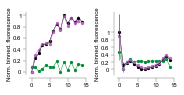

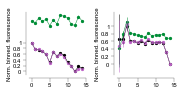

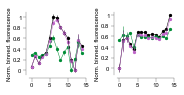

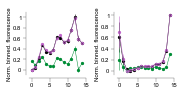

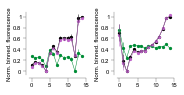

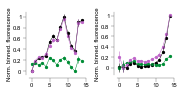

In [16]:
path = paths[108]
#Example of motor tuning before and after subtraction of the fluorescence predicted from motor or stimulus variables
plotMotorSub_example(path, ops)

In [17]:
df = pd.read_csv(os.path.join(ops['dataPath'],'frequencies_dataset', 'df_freq_peak_boutons.csv')) #dataframe with info for each roi
paths0 = np.load(os.path.join(ops['dataPath'],'frequencies_dataset', 'animalPaths_freqs.npy'))
paths = makeDataPaths(os.path.join(ops['dataPath'],'data_byAnimal'),paths0)  
dataset = 'frequencies'

#Get percentage of boutons with significant motor tuning (see Methods) with and without subtracting predicted fluorescence
prop_highVar, prop_highVar_stimSub, prop_highVar_motorSub = getMotorSub_vars(df, paths, dataset)

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [00:38<00:00,  4.16it/s]


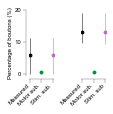

In [18]:
#Plot percentage of boutons with significant motor tuning (see Methods) with and without subtracting predicted fluorescence
p_loc, p_face = plotMotorSub_quantification(prop_highVar, prop_highVar_stimSub, prop_highVar_motorSub, ops, dataset)

1.564064800149929e-16
0.009814564424354242


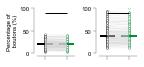

In [19]:
df = pd.read_csv(os.path.join(ops['dataPath'],'frequencies_dataset', 'df_freq_peak_boutons.csv')) #dataframe with info for each roi
#Plot effect of motor prediction subtraction on percentage of tone responsive and frequency tuned boutons
plotResp_motorSub_freq(df, ops)

100%|█████████████████████████████████████████████████████████████████████████| 99271/99271 [00:05<00:00, 17099.76it/s]


2.009895910204982e-05


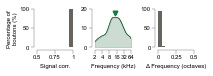

In [20]:
df = pd.read_csv(os.path.join(ops['dataPath'],'frequencies_dataset', 'df_freq_peak_boutons.csv')) #dataframe with info for each roi
#Plot effect of motor prediction subtraction on frequency tuning
plotFrequencyChange(df, ops)

#### Locations dataset

In [21]:
df = pd.read_csv(os.path.join(ops['dataPath'],'locations_dataset', 'df_coliseum_boutons_final.csv')) #dataframe with info for each roi
paths0 = np.load(os.path.join(ops['dataPath'],'locations_dataset', 'animalPaths_locations.npy'))
paths = makeDataPaths(os.path.join(ops['dataPath'],'data_byAnimal'),paths0)   
dataset = 'locations'

#Get percentage of boutons with significant motor tuning (see Methods) with and without subtracting predicted fluorescence
prop_highVar, prop_highVar_stimSub, prop_highVar_motorSub = getMotorSub_vars(df, paths, dataset)

100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [00:43<00:00,  3.07it/s]


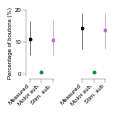

In [22]:
#Plot percentage of boutons with significant motor tuning (see Methods) with and without subtracting predicted fluorescence
p_loc, p_face = plotMotorSub_quantification(prop_highVar, prop_highVar_stimSub, prop_highVar_motorSub, ops, dataset)

1.1948415472570759e-05
2.609759210301521e-05
0.0005985903697536006


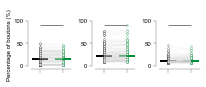

In [23]:
df = pd.read_csv(os.path.join(ops['dataPath'],'locations_dataset', 'df_coliseum_boutons_final.csv')) #dataframe with info for each roi
dataset = 'locations'
#Plot effect of motor prediction subtraction on percentage of tone responsive and frequency tuned boutons
plotResp_motorSub_locations(df, ops)

100%|█████████████████████████████████████████████████████████████████████████| 83454/83454 [00:06<00:00, 12052.95it/s]


0.9999955499088601


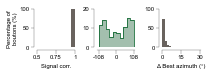

In [24]:
#Plot effect of motor prediction subtraction on azimuth tuning
plotLocationChange(df, ops)